# Histograms
<p> - Biểu đồ tần suất (Histograms): biểu đồ hiển thị sự phân bố các giá trị trong hình ảnh bằng cách ghép từng phần tử theo cường độ của nó sau đó đếm số lượng của mỗi phần. </p>
<p>- Hàm phân phối tích lũy: đo tần số mà một phạm vi cường độ pixel nhất định xảy ra. </p>
<p> - Sự phân bố thường tập trung ở các giá trị có cường độ thấp (giá trị nền), để có thể tập trung vào đối tượng muốn quan sát ta cần phân phối lại các giá trị cho tối ưu hóa toàn dải cường độ (hay nói cách khác ta cần cân bằng ảnh). </p>

In [2]:
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import numpy as np
import imageio

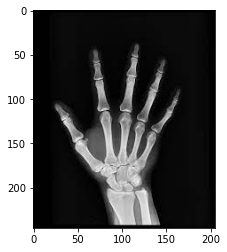

In [3]:
im = imageio.imread('hand_Xray.JPG')
plt.imshow(im, cmap='gray')
plt.show()

In [4]:
hist = ndi.histogram(im, min = 0 , max = 255, bins = 256) # gia tri toi thieu, toi da va so luong thung
hist.shape

(256,)

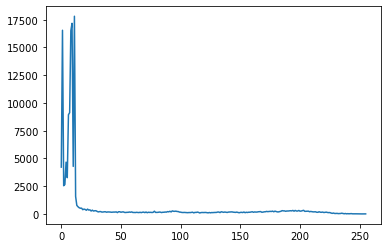

In [5]:
plt.plot(hist)
plt.show()

In [6]:
cdf = hist.cumsum()/hist.sum() 
cdf.shape

(256,)

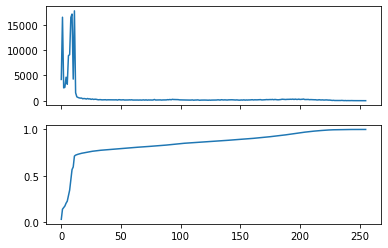

In [7]:
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist)
axes[1].plot(cdf)
plt.show()

In [8]:
im_equalized = cdf[im]
im_equalized

array([[[0.13721991, 0.13721991, 0.13721991],
        [0.13721991, 0.13721991, 0.13721991],
        [0.13721991, 0.13721991, 0.13721991],
        ...,
        [0.13721991, 0.13721991, 0.13721991],
        [0.13721991, 0.13721991, 0.13721991],
        [0.13721991, 0.13721991, 0.13721991]],

       [[0.13721991, 0.13721991, 0.13721991],
        [0.13721991, 0.13721991, 0.13721991],
        [0.13721991, 0.13721991, 0.13721991],
        ...,
        [0.13721991, 0.13721991, 0.13721991],
        [0.13721991, 0.13721991, 0.13721991],
        [0.13721991, 0.13721991, 0.13721991]],

       [[0.13721991, 0.13721991, 0.13721991],
        [0.13721991, 0.13721991, 0.13721991],
        [0.13721991, 0.13721991, 0.13721991],
        ...,
        [0.13721991, 0.13721991, 0.13721991],
        [0.13721991, 0.13721991, 0.13721991],
        [0.13721991, 0.13721991, 0.13721991]],

       ...,

       [[0.13721991, 0.13721991, 0.13721991],
        [0.13721991, 0.13721991, 0.13721991],
        [0.13721991, 0

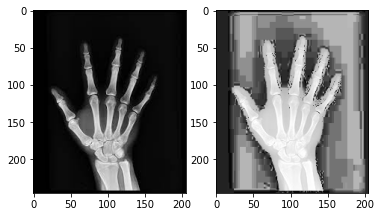

In [9]:
fig, axes = plt.subplots(1,2)
axes[0].imshow(im)
axes[1].imshow(im_equalized)
plt.show()

# Masks
<p> Masks là phương pháp chính để loại bỏ hoặc chọn các phần cụ thể của hình ảnh. </p>
<h3> a, Create a mask </h3>
<p> - Masks được tạo bằng cách áp dụng một hoặc nhiều thao tác logic cho hình ảnh và trả về mảng nhị phân cho biết liệu một giá trị có nên được đưa vào phân tích hay không. </p>

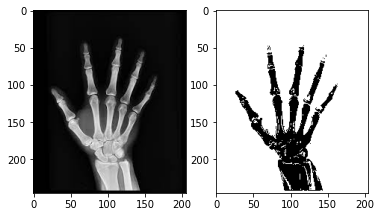

In [10]:
mask_bone = (im>100) & (im<220)
im_bone1 = np.where(mask_bone, 0 , 255)
fig, axes = plt.subplots(1,2)
axes[0].imshow(im, cmap = 'gray')
axes[1].imshow(im_bone1, cmap = 'gray')
plt.show()

<h3> b, Apply a mask </h3>
<p> - Mask có thể được áp dụng cho hình ảnh để lọc ra các pixel có giá trị là False. </p>
<p> - Hàm where() của thư viện NumPy giúp ta có thể áp dụng các mask một cách linh hoạt </p>

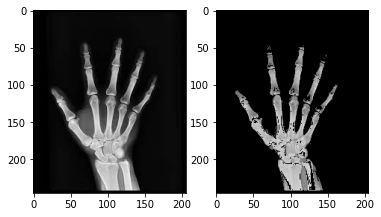

In [11]:
im_bone2 = np.where(mask_bone, im , 0)
fig, axes = plt.subplots(1,2)
axes[0].imshow(im, cmap = 'gray')
axes[1].imshow(im_bone2, cmap = 'gray')
plt.show()

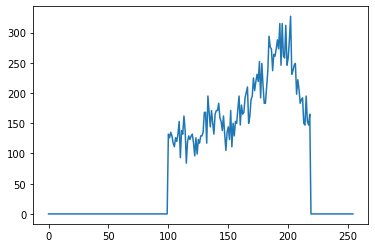

In [12]:
hist = ndi.histogram(im_bone2, min = 1, max = 255, bins = 255)
plt.plot(hist)

<h3> c, Tune a mask </h3>
<p> - Mask không hoàn hảo có thể được điều chỉnh thông qua việc bổ sung hay loại bỏ các pixel. Thư viện Scipy có một số phương pháp hữu ích để thực hiện các công việc này. </p>

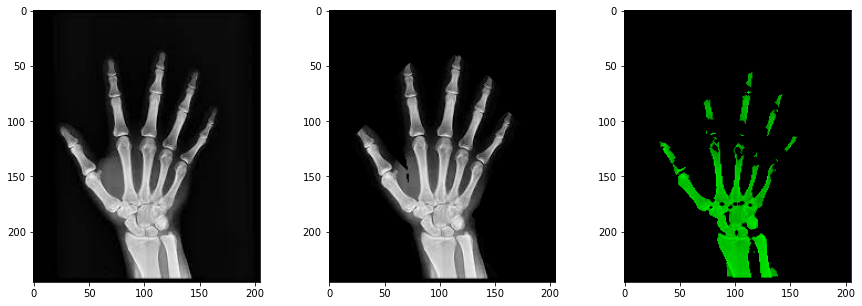

In [13]:
mask = im >= 140
mask_dilate = ndi.binary_dilation (mask, iterations=10)
im_dilate = np.where(mask_dilate, im , 0)

mask_erosion = ndi.binary_erosion (mask, iterations=1)
im_erosion = np.where(mask_erosion, im , 0)

# Plot masked images
fig, axes = plt.subplots(1,3,figsize = (15,5))
axes[0].imshow(im)
axes[1].imshow(im_dilate)
axes[2].imshow(im_erosion,cmap = 'gray')
plt.show()


# Filters
<p> - Filter là một công cụ thiết yếu trong xử lý hình ảnh. Chúng cho phép bạn chuyển đổi hình ảnh dựa trên các giá trị cường độ xung quanh một pixel, thay vì toàn cầu. </p>
<p> - Trong thư viện Scipy cung cấp hàm ndi.convolve(im, weights) giúp thực hiện nhân mảng với hạt nhân đã cho theo tích chập thu được mảng cùng kích thước với mảng ban đầu. </p>
<p> - Các phép tích chập dựa trên một tập hợp các trọng số, nhưng việc lọc cũng có thể được thực hiện bằng cách sử dụng các hàm như giá trị trung bình, trung vị và tối đa. Cũng giống như với các phép tích chập, các chức năng lọc sẽ cập nhật từng giá trị pixel dựa trên vùng lân cận cục bộ của nó. </p>
<p> - Smoothing có thể cải thiện tỷ lệ tín hiệu trên nhiễu của hình ảnh bằng cách làm mờ các biến thể nhỏ về cường độ. Bộ lọc Gaussian khá hiệu quả cho việc này: nó là một kernel giúp làm mịn hình tròn (hoặc hình cầu), có số lượng các pixel gần đó cao hơn các pixel ở xa. Chiều rộng của phân bố được kiểm soát bởi đối số sigma, với các giá trị càng cao dẫn đến hiệu ứng làm mịn càng lớn hơn. </p>

In [14]:
im = imageio.imread('brain_001.dcm')
weights = np.array([[0, -1, 0],
                    [-1, 5,-1],
                    [0, -1, 0]])
im_filt = ndi.convolve(im , weights)

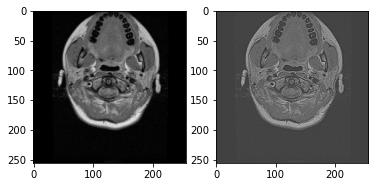

In [15]:
fig, axes = plt.subplots(1,2)
axes[0].imshow(im, cmap = 'gray')
axes[1].imshow(im_filt, cmap = 'gray')
plt.show()

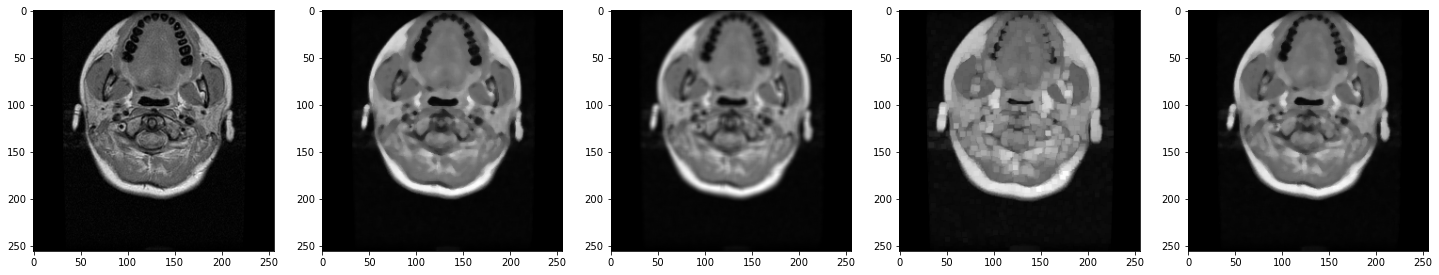

In [16]:
result1 = ndi.median_filter(im, size=5)
result2 = ndi.uniform_filter(im, size= 5)
result3 = ndi.maximum_filter(im, size = 5)
result4 = ndi.percentile_filter(im,60,size=5)
fig, axes = plt.subplots(1,5,figsize = (25,5))
axes[0].imshow(im, cmap = 'gray')
axes[1].imshow(result1, cmap= 'gray')
axes[2].imshow(result2, cmap= 'gray')
axes[3].imshow(result3, cmap= 'gray')
axes[4].imshow(result4, cmap= 'gray')
plt.show()

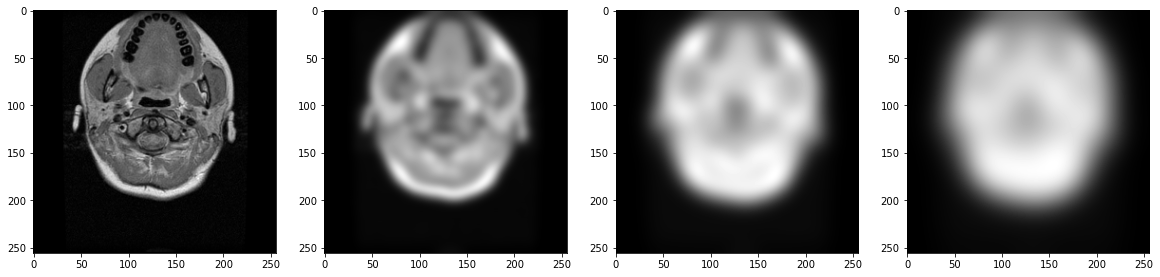

In [17]:
im_gaussian1 = ndi.gaussian_filter(im , sigma=5)
im_gaussian2 = ndi.gaussian_filter(im , sigma=10)
im_gaussian3 = ndi.gaussian_filter(im , sigma=15)
fig, axes = plt.subplots(1,4,figsize = (20,5))
axes[0].imshow(im, cmap = 'gray')
axes[1].imshow(im_gaussian1, cmap = 'gray')
axes[2].imshow(im_gaussian2, cmap = 'gray')
axes[3].imshow(im_gaussian3, cmap = 'gray')
plt.show()


# Detect Edges
<p> - Detect Edge (phát hiện cạnh) có thể được thực hiện dọc theo nhiều trục, sau đó kết hợp thành một giá trị cạnh duy nhất. Đối với hình ảnh 2D, "edge maps" ngang và dọc có thể được kết hợp bằng cách sử dụng định lý Pytago: z = √(x^2+ y^2 ). </p>
<p> 

In [18]:
weights = [[0, -1, 0],
           [-1, 5, -1],
           [0, -1, 0]]
edges = ndi.convolve(im, weights)

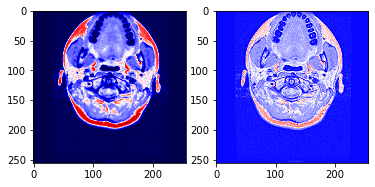

In [33]:
fig, axes = plt.subplots(1,2)
axes[0].imshow(im, cmap = 'seismic')
axes[1].imshow(edges, cmap = 'seismic')
plt.show()

<p> - Một máy dò cạnh phổ biến là bộ lọc Sobel. Bộ lọc Sobel cung cấp thêm trọng số cho các pixel trung tâm của máy dò </p>

In [21]:
im_sobel0 = ndi.sobel(im, axis = 0) # Kernel Sobel horizontal 	
im_sobel1 = ndi.sobel(im, axis = 1) # Kernel Sobel vertical

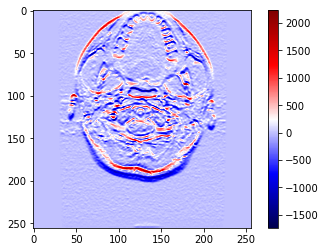

In [34]:
plt.imshow(im_sobel0, cmap = 'seismic')
plt.colorbar()
plt.show()

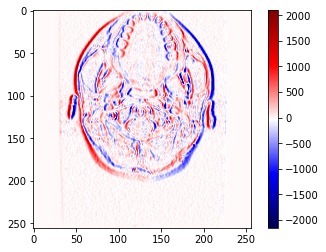

In [35]:
plt.imshow(im_sobel1, cmap = 'seismic')
plt.colorbar()
plt.show()

<ipython-input-54-d1b1a086d66b>:1: RuntimeWarning: invalid value encountered in sqrt
  edges = np.sqrt(np.square(im_sobel0) + np.square(im_sobel1))


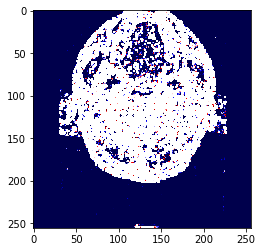

In [54]:
edges = np.sqrt(np.square(im_sobel0) + np.square(im_sobel1))
plt.imshow(edges, cmap='seismic', vmin=100,vmax=160)
plt.show()

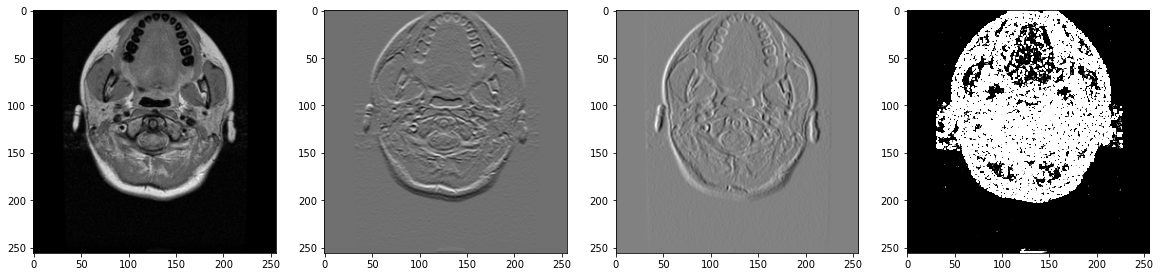

In [58]:
fig, axes = plt.subplots(1,4,figsize = (20,5))
axes[0].imshow(im, cmap = 'gray')
axes[1].imshow(im_sobel0, cmap = 'gray')
axes[2].imshow(im_sobel1, cmap = 'gray')
axes[3].imshow(edges, cmap='gray', vmin=110,vmax=160)
plt.show()